# Digit-recognizer

https://www.kaggle.com/c/digit-recognizer

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# download data
!kaggle competitions download -c digit-recognizer -p /data

# extract data
!unzip /data/digit-recognizer -d /data/digit-recognizer

digit-recognizer.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /data/digit-recognizer.zip
replace /data/digit-recognizer/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


## Data exploration

In [3]:
!ls /data/digit-recognizer

sample_submission.csv  test.csv  train.csv


The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

In [4]:
import pandas as pd

path = '/data/digit-recognizer'
train = pd.read_csv(f'{path}/train.csv')
test = pd.read_csv(f'{path}/test.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

In [6]:
sample_submission = pd.read_csv(f'{path}/sample_submission.csv')
sample_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


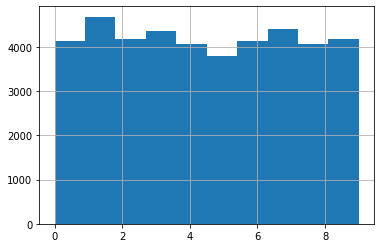

In [7]:
# visualize class distribution in train set

import matplotlib.pyplot as plt
%matplotlib inline

train['label'].hist(bins=10)
plt.show()

In [8]:
# convert data to images

def transform(data, train=True):
    if train:
        return pd.DataFrame({'label': data['label'].values, 'image': [img.reshape(28,28) for img in data.drop(columns=['label']).values]})
    return pd.DataFrame({'image': [img.reshape(28,28) for img in data.values]})

train_trans = transform(train)
test_trans = transform(test, train=False)

train_trans

,label,image
0,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...
41995,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
41996,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
41997,7,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
41998,6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [9]:
test_trans

,image
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...
27995,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
27996,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
27997,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
27998,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


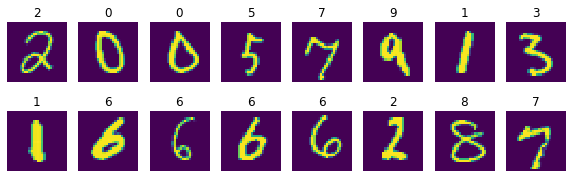

In [10]:
# visualize some images

import random

fig, axs = plt.subplots(2,8, figsize=(10,3))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(train_trans)-1)
    img = train_trans['image'][ix]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(train_trans['label'][ix])
plt.show()

In [11]:
# split train set in train-validation

from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(train_trans, test_size=0.2, stratify=train_trans['label'])

train_data.shape, val_data.shape

((33600, 2), (8400, 2))

## Train CNN

In [12]:
import utils
import torch

In [13]:
def block(c_in, c_out, k=3, p=1, s=1, pk=2, ps=2):
    return torch.nn.Sequential(
        torch.nn.Conv2d(c_in, c_out, k, padding=p, stride=s),
        torch.nn.ReLU(),
        torch.nn.BatchNorm2d(c_out),
        torch.nn.MaxPool2d(pk, stride=ps)
    )

def block2(c_in, c_out):
    return torch.nn.Sequential(
        torch.nn.Linear(c_in, c_out),
        torch.nn.BatchNorm1d(c_out),
        torch.nn.ReLU()
    )

In [14]:
class CNN(torch.nn.Module):
  def __init__(self, n_channels=1, n_outputs=10):
    super().__init__()
    self.conv1 = block(n_channels, 64)
    self.conv2 = block(64, 128)
    self.fc1 = block2(128*7*7, 100)
    self.fc2 = torch.nn.Linear(100, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(x.shape[0], -1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

In [15]:
model = utils.Model(CNN())

model.compile(dataset=utils.GreyImageDataset,
              optimizer = torch.optim.SGD(model.net.parameters(), lr=0.1),
              loss = torch.nn.CrossEntropyLoss(),
              metrics=[utils.Accuracy()],
              device="cuda" if torch.cuda.is_available() else "cpu")

hist = model.fit(train_data['image'].values, 
                 train_data['label'].values, 
                 validation_data=(val_data['image'].values, val_data['label'].values), 
                 epochs=100,
                 early_stopping=5)

training stopped at epoch 24
best model found at epoch 19 with val_loss 0.02588


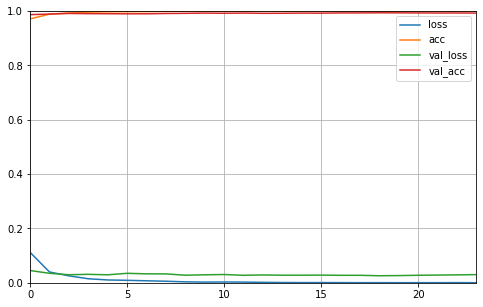

In [16]:
def plot_hist(history, lim=1):
  pd.DataFrame(history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, lim)
  plt.show()

plot_hist(hist)

In [17]:
model.evaluate(val_data['image'].values, 
               val_data['label'].values)

## Submission

In [21]:
# compute labels for test images

pred_labels = model.predict(test_trans['image'])
pred_labels = torch.argmax(pred_labels, axis=1)
pred_labels

tensor([2, 0, 9,  ..., 3, 9, 2], device='cuda:0')

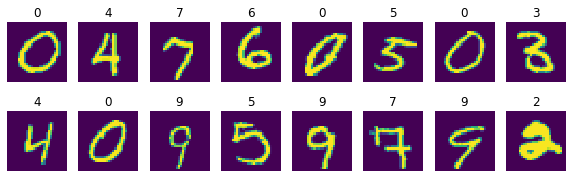

In [27]:
# visualize some predictions

import random
import numpy as np

fig, axs = plt.subplots(2,8, figsize=(10,3))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(test_trans)-1)
    img = test_trans['image'][ix]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(pred_labels[ix].item())
plt.show()

In [31]:
submission = pd.DataFrame({'ImageId':sample_submission['ImageId'], 'Label': pred_labels.cpu() })
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [37]:
# save submission file

filename = f'{path}/submission.csv'
submission.to_csv(filename, index=False)

In [38]:
# make submssion to kaggle

!kaggle competitions submit -c digit-recognizer -f {filename} -m "My submission"

100%|████████████████████████████████████████| 208k/208k [00:03<00:00, 62.2kB/s]
Successfully submitted to Digit Recognizer